Simple Method

In [16]:
import numpy
import scipy.stats
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas import DataFrame
%matplotlib inline

In [22]:
def var_cov_var(P, c, mu, sigma):
    """
    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P.
    """
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

In [23]:
if __name__ == "__main__":
    start = datetime.datetime(2010, 1, 1)
    end = datetime.datetime(2014, 1, 1)

In [24]:
    aapl = web.DataReader("AAPL", 'yahoo', start, end)
    aapl["rets"] = aapl["Adj Close"].pct_change()

In [25]:
    P = 1e6   # 1,000,000 USD
    c = 0.95  # 99% confidence interval
    mu = np.mean(citi["rets"])
    simga =0.025
    #sigma = np.std(citi["rets"])

In [26]:
    var = var_cov_var(P, c, mu, sigma)
    print "Value-at-Risk: $%0.2f" % var

Value-at-Risk: $39736.34


Detailed Method

In [27]:
import numpy
import scipy.stats
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas import DataFrame
%matplotlib inline
%config InlineBackend.figure_formats=['png']

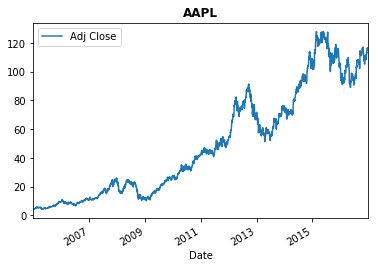

In [28]:
start = datetime.datetime(2005, 1, 1)
end   = datetime.datetime(2017, 1, 1)
aapl = web.DataReader("AAPL", "yahoo", start, end)
aapl.plot(y="Adj Close")
plt.title(u"AAPL", weight='bold');

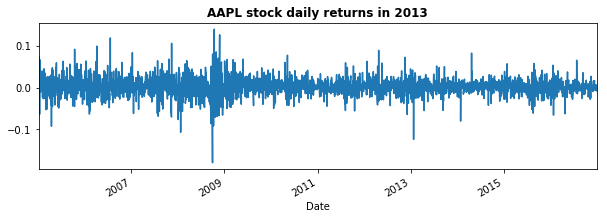

In [29]:
fig = plt.figure()
fig.set_size_inches(10,3)
aapl["Adj Close"].pct_change().plot()
plt.title(u"AAPL stock daily returns in 2013", weight='bold');

0.021379400866345856

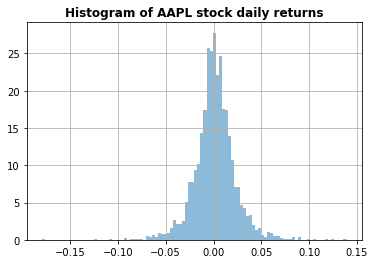

In [31]:
aapl["Adj Close"].pct_change().hist(bins=100, normed=True, histtype='stepfilled', alpha=0.5)
plt.title(u"Histogram of AAPL stock daily returns", weight='bold')
aapl["Adj Close"].pct_change().std()

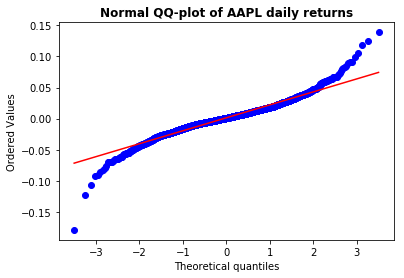

In [32]:
Q = aapl["Adj Close"].pct_change().dropna().as_matrix()
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title(u"Normal QQ-plot of AAPL daily returns", weight="bold");

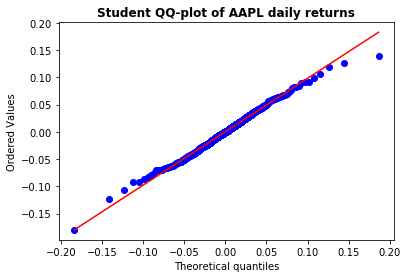

In [33]:
tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
plt.title(u"Student QQ-plot of AAPL daily returns", weight="bold");

Value at Risk Using Bootstrap Method

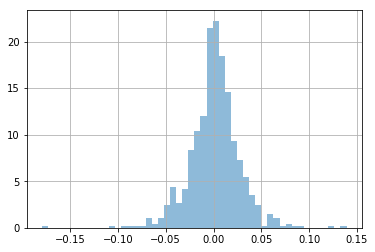

In [38]:
start = datetime.datetime(2008, 1, 1)
end   = datetime.datetime(2011, 1, 1)
stock = web.DataReader("AAPL", "yahoo", start, end)
returns = stock["Close"].pct_change().dropna()
mean = returns.mean()
sigma = returns.std()
tdf, tmean, tsigma = scipy.stats.t.fit(returns.as_matrix())
returns.hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5);

In [39]:
returns.quantile(0.05)

-0.041544527032195216

the 0.05 empiracle quantile of daily returns is -0.041. Means that with 95% confidence, the worst daily loss will not exceed 4.15%

Value at Risk using the variance-covariance method

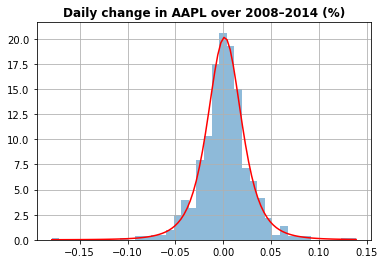

In [40]:
support = numpy.linspace(returns.min(), returns.max(), 100)
returns.hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5);
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-")
plt.title(u"Daily change in AAPL over 2008–2014 (%)", weight='bold');

In [41]:
scipy.stats.norm.ppf(0.05, mean, sigma)

-0.042558653839960284

Our analytic 0.05 quantile is at -0.04255, so with 95% confidence, our worst daily loss will not exceed 3.84%. For a 1M€ investment, one-day Value at Risk is 0.0384 * 1M€ = 38k€.

VAR using Monte Carlo Method

In [42]:
days = 300   # time horizon
dt = 1/float(days)
sigma = 0.04 # volatility
mu = 0.05  # drift (average growth rate)

In [44]:
##This function simulates one stock market evolution, and returns the price evolution as an array. 
##It simulates geometric Brownian motion using random numbers drawn from a normal distribution 
def random_walk(startprice):
    price = numpy.zeros(days)
    shock = numpy.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = numpy.random.normal(loc=mu * dt, scale=sigma * numpy.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

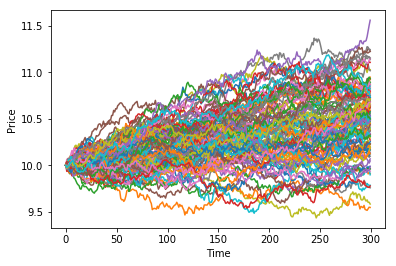

In [47]:
#Let's simulate 30 random walks, starting from an initial stock price of 10€, for a duration of 300 days.
for run in range(100):
    plt.plot(random_walk(10.0))
plt.xlabel("Time")
plt.ylabel("Price");

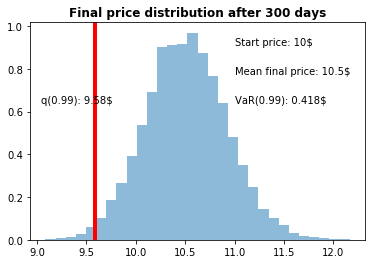

In [49]:
runs = 10000
simulations = numpy.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(10.0)[days-1]
q = numpy.percentile(simulations, 1)
plt.hist(simulations, normed=True, bins=30, histtype='stepfilled', alpha=0.5)
plt.figtext(0.6, 0.8, u"Start price: 10$")
plt.figtext(0.6, 0.7, u"Mean final price: {:.3}$".format(simulations.mean()))
plt.figtext(0.6, 0.6, u"VaR(0.99): {:.3}$".format(10 - q))
plt.figtext(0.15, 0.6, u"q(0.99): {:.3}$".format(q))
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution after {} days".format(days), weight='bold');